In [1]:
from bs4 import BeautifulSoup
import pprint as pprint
import urllib.parse
import time
import requests



index = str(input('想抓取哪個ptt看板？(ex: 黑政版請輸入 https://www.ptt.cc/bbs/HatePolitics/index4045.html)：\n'))
pages = eval(input('想抓取幾頁呢？ex: 5：'))

not_exist = BeautifulSoup('<a>(本文已被刪除)</a>', 'lxml').a

def get_comments_on_article(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    comments = []

    main_content = soup.find('div', id='main-content')
    if main_content:
        push_elements = main_content.find_all('div', class_='push')
        for push in push_elements:
            push_info = list(push.stripped_strings)
            if len(push_info) >= 4:
                comment = {
                    'push_tag': push_info[0],
                    'push_user': push_info[1],
                    'push_content': push_info[2],
                    'push_time': push_info[3]
                }
                comments.append(comment)

    return comments


def get_articles_and_comments(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    articles = []

    for i in soup.find_all('div', 'r-ent'):
        meta = i.find('div', 'title').find('a') or not_exist
        article_url = urllib.parse.urljoin(url, meta.get('href'))
        articles.append({
            'title': meta.getText().strip(),
            'url': article_url,
        })

    return articles

def get_pages(num):
    page_url = index
    all_articles = []

    for j in range(num):
        response = requests.get(page_url)
        articles = get_articles_and_comments(page_url)
        for article in articles:
            article_comments = get_comments_on_article(article['url'])
            article['comments'] = article_comments
            all_articles.append(article)
        page_url = urllib.parse.urljoin(index, BeautifulSoup(response.text, 'lxml').find('div', 'btn-group-paging').find_all('a', 'btn')[1].get('href'))

    return all_articles


data = get_pages(pages)

for article in data:
    pprint.pprint(article)

csv_or_not = input('輸入 y 以匯出成csv檔，輸入其他結束程式：')

if csv_or_not == 'y':
    board = index.split('/')[-2]
    csv = open('./ptt_%s版_前%d頁_評論.csv' % (board, pages), 'a+', encoding='utf-8')
    csv.write('標題,評論內容,評論時間,評論者,\n')
    for article in data:
        for comment in article['comments']:
            csv.write(article['title'] + ',' + comment['push_content'] + ',' + comment['push_time'] + ',' + comment['push_user'] + ',\n')
    csv.close()
    print('CSV檔案已儲存在您的資料夾中。')
else:
    quit()


想抓取哪個ptt看板？(ex: 黑政版請輸入 https://www.ptt.cc/bbs/HatePolitics/index4045.html)：
https://www.ptt.cc/bbs/HatePolitics/index500.html
想抓取幾頁呢？ex: 5：1
{'comments': [{'push_content': ': 推懂採購法',
               'push_tag': '推',
               'push_time': '111.243.72.121 08/30 00:43',
               'push_user': 'Mancer'},
              {'push_content': ': 又一個天生神力的殷實商人 成立半年 光',
               'push_tag': '推',
               'push_time': '27.247.196.143 08/30 00:44',
               'push_user': 'jacklyl'},
              {'push_content': ': 速雀屏中選進入黨的獨賣進口蛋商名單',
               'push_tag': '→',
               'push_time': '27.247.196.143 08/30 00:44',
               'push_user': 'jacklyl'},
              {'push_content': ': 87白糞只會腦補小劇場',
               'push_tag': '推',
               'push_time': '49.217.237.226 08/30 00:45',
               'push_user': 'timeriver235'},
              {'push_content': ': 柯粉看到限制性招標還會自動推導出官',
               'push_tag': '推',
               'push_time': '101.9.102.106 08/30 

##評論的情感分析


In [ ]:
! pip install snownlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 37.6/37.6 MB 51.6 MB/s eta 0:00:01
ERROR: Operation cancelled by user


In [ ]:
! pip install snownlp
from snownlp import SnowNLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760944 sha256=54bff50ee9de364451f5dc8733c9ab94dc42cb99e3a433c66964966b15360025
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built snownlp


In [ ]:
#讀取資料
import pandas as pd
df = pd.read_csv('ptt_HatePolitics版_前100頁_12月.csv')
title = df.iloc[:, [0, 1]]
title.rename(columns={'標題': 'target', '評論內容': 'comment'}, inplace=True)
print(title)

                             target                 comment
0                [轉錄] 且看綠官們如何面對禮義廉恥            : 中國的恥在於台灣民主
1                [轉錄] 且看綠官們如何面對禮義廉恥           : 壞人的恥 在於被警察抓
2                [轉錄] 且看綠官們如何面對禮義廉恥       : 無恥之人 慣於以立場定恥與是非
3                [轉錄] 且看綠官們如何面對禮義廉恥   : 讀了廉恥就有廉恥?不讀廉恥就不知廉恥?
4                [轉錄] 且看綠官們如何面對禮義廉恥               : 超買不是走私！
...                             ...                     ...
85904  Re: [新聞] 高虹安告周玉蔻影射「與有婦之夫交往」不   : 看新聞報導的論述，好像是有重疊到是之後
85905  Re: [新聞] 高虹安告周玉蔻影射「與有婦之夫交往」不                   : 才離婚
85906  Re: [新聞] 高虹安告周玉蔻影射「與有婦之夫交往」不            : 沒離婚前 就是小三阿
85907  Re: [新聞] 高虹安告周玉蔻影射「與有婦之夫交往」不  : 李 就不敢講何時離婚啊 公布就一刀斃命w
85908             [討論] 阿北是否在用身體實踐科學                 : 請正名柯學

[85909 rows x 2 columns]


<ipython-input-3-7d122e485280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title.rename(columns={'標題': 'target', '評論內容': 'comment'}, inplace=True)


### 民眾黨&小黨關鍵字篩選

In [ ]:
#民眾黨
#篩選標題中的小黨關鍵字
#篩target
keywords = ['柯文哲','民眾黨','白色力量', 'kp', '柯P','阿北','柯','白','柯粉','KP','黃國昌','國蔥','蔥']
filtered_df = title[title['target'].str.contains('|'.join(keywords), case=False)]
print(filtered_df)

                             target          comment
24         [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨   : 區域別做夢啦 整天打雞血
25         [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨      : 蔡璧如….....
26         [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨      : 新竹民眾黨又沒提名
27         [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨       : 柯妹哪有機會啦?
28         [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨    : 國民黨都不敢選了才給你
...                             ...              ...
85878  Re: [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!     : 黨當可以監督啊!!!
85879  Re: [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!  : 日本民眾也會監督在野黨啊。
85880  Re: [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!      : 南投國民黨是執政黨
85881  Re: [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!           : 綠共急了
85908             [討論] 阿北是否在用身體實踐科學          : 請正名柯學

[33165 rows x 2 columns]


In [ ]:
#篩comment
keywords1 = ['小黨','席位','席次','國會','15%','第三政黨','立委','少數','關鍵','15趴','10趴','11趴','政黨票','第三','三大']
filtered_df1 = filtered_df[filtered_df['comment'].str.contains('|'.join(keywords1), case=False)]
print(filtered_df1)

                         target                   comment
39     [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨        : 笑死  說自己墨綠 然後立委反綠
65     [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨     : 其實有稍微跟過那些立委候選人發言的就知
73     [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨   : 統 政黨票雙崩耶 同時也代表TMD內參完全
97     [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨  : 不分區也就34席 你拿15席粗估政黨票也要拿
107    [新聞] 柯文哲民調雪崩「不分區難保5席」？爆黨     : 柯黨區域立委候選人魅力不足，名氣不夠，
...                         ...                       ...
85327         [討論] 柯現在是不是要祈禱兩件事      : 民眾黨關不關鍵，還是沒有他的票數重要
85512  [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!        : 萬里也是黃國昌當立委時的選區，上
85547  [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!        : 不分區立委不好好提自己政見是在?
85763  [新聞] 柯文哲如何說服入黨？黃國昌秀2人會議紀     : 第三點就是服貿 直說就好 不用堆砌文字
85839   [討論] 李登輝：柯文哲實在說起來，思想有問題        : 萬里也是黃國昌當立委時的選區，上

[414 rows x 2 columns]


In [ ]:
#篩選評論欄
key_comment = filtered_df1.iloc[:, 1]
print(key_comment)

39             : 笑死  說自己墨綠 然後立委反綠
65          : 其實有稍微跟過那些立委候選人發言的就知
73        : 統 政黨票雙崩耶 同時也代表TMD內參完全
97       : 不分區也就34席 你拿15席粗估政黨票也要拿
107         : 柯黨區域立委候選人魅力不足，名氣不夠，
                   ...           
85327        : 民眾黨關不關鍵，還是沒有他的票數重要
85512          : 萬里也是黃國昌當立委時的選區，上
85547          : 不分區立委不好好提自己政見是在?
85763       : 第三點就是服貿 直說就好 不用堆砌文字
85839          : 萬里也是黃國昌當立委時的選區，上
Name: comment, Length: 414, dtype: object


In [ ]:
comment = str(key_comment)
s = SnowNLP(comment)
#所有句子的情緒分析
print(s.sentiments)


1.3620768213318257e-07


### 民眾黨篩選

In [ ]:
#民眾黨
#篩target
keywords = ['柯文哲','民眾黨','白色力量', 'kp', '柯P','阿北','柯','白','柯粉','KP','黃國昌','國蔥','蔥']
white_df = title[title['target'].str.contains('|'.join(keywords), case=False)]
print(white_df)

                          target                       comment
33      [新聞] 「館長」突襲探班柯文哲、黃國昌 承諾1                     : 噓的人滾出甲板
34      [新聞] 「館長」突襲探班柯文哲、黃國昌 承諾1  : 有愛滋代表很多人愛你，有人沒人跟他愛，連梅毒都沒得到
35      [新聞] 「館長」突襲探班柯文哲、黃國昌 承諾1                           : 慘
36      [新聞] 「館長」突襲探班柯文哲、黃國昌 承諾1               : 噓的人一定是忌妒他很多人愛
37      [新聞] 「館長」突襲探班柯文哲、黃國昌 承諾1                    : 做愛前說你有愛滋
...                          ...                           ...
870465         [討論] 侯已經不得不去跟郭柯談了              : 殺人强姦犯有槍，不是都去了？
870466         [討論] 侯已經不得不去跟郭柯談了            : 如果還能贏賴，真的是世界奇蹟，原
870467         [討論] 侯已經不得不去跟郭柯談了            : 先還是穩贏的局，被各自私心害死。
870468         [討論] 侯已經不得不去跟郭柯談了           : 勾冥洞這些自我作為跟我講是為中華民
870469         [討論] 侯已經不得不去跟郭柯談了                    : 國我家的狗也不信

[377805 rows x 2 columns]


In [ ]:
key_comment = white_df.iloc[:, 1]
print(key_comment)

33                           : 噓的人滾出甲板
34        : 有愛滋代表很多人愛你，有人沒人跟他愛，連梅毒都沒得到
35                                 : 慘
36                     : 噓的人一定是忌妒他很多人愛
37                          : 做愛前說你有愛滋
                      ...             
870465                : 殺人强姦犯有槍，不是都去了？
870466              : 如果還能贏賴，真的是世界奇蹟，原
870467              : 先還是穩贏的局，被各自私心害死。
870468             : 勾冥洞這些自我作為跟我講是為中華民
870469                      : 國我家的狗也不信
Name: comment, Length: 377805, dtype: object


In [ ]:
comment = str(key_comment)  # Convert to string if not already
s = SnowNLP(comment)
#句子切分
sentences = s.sentences
print(SnowNLP(s.sentences[1]).sentiments)

#所有句子的情感分析

print(s.sentiments)

0.9930406433890437
0.9998164603273054


### 國民黨篩選

In [ ]:
#國民黨關鍵字
#篩target
blue_key =['侯友宜','國民黨','侯侯做代誌', '侯', '警察','侯侯','藍','在野','侯粉','親中','馬英九','朱立倫','新北','趙少康','侯康','藍營','KMT']
blue_df = title[title['target'].str.contains('|'.join(blue_key), case=False)]
print(blue_df)


                                target                  comment
631    Re: [討論] 認真  如果DPP是在野黨  會怎麼監督蛋？             : 中共拆違建也是一流哦
632    Re: [討論] 認真  如果DPP是在野黨  會怎麼監督蛋？       : 啥憑空長高的，啥宅基地外蓋廁所的
633    Re: [討論] 認真  如果DPP是在野黨  會怎麼監督蛋？       : 管你是紅五類礦工之子，拆，拆，拆
634    Re: [討論] 認真  如果DPP是在野黨  會怎麼監督蛋？            : 現在油凍漲 物價還是貴
635    Re: [討論] 認真  如果DPP是在野黨  會怎麼監督蛋？     : 中國食物標中國產地就沒問題 不然進萊
...                                ...                      ...
82847          [新聞] 「藍白合」對抗賴清德？卓榮泰：一對一  : 卓性政客腦袋還停留在30年前民進黨創立時代
82848          [新聞] 「藍白合」對抗賴清德？卓榮泰：一對一  :  為台灣人民福祉打拼 現在執政成績爛成一坨
82849          [新聞] 「藍白合」對抗賴清德？卓榮泰：一對一  : 大便 只想趁機大撈特撈 金銀財寶進口袋 這
82850          [新聞] 「藍白合」對抗賴清德？卓榮泰：一對一   : 種貪腐行為路人皆知 還想立委過半 真正是
82851          [新聞] 「藍白合」對抗賴清德？卓榮泰：一對一    : 阿q的平行宇宙 不知今夕何夕 可憐啊！

[3348 rows x 2 columns]


In [ ]:
#篩選評論欄
key_comment = blue_df.iloc[:, 1]
print(key_comment)

631                 : 中共拆違建也是一流哦
632           : 啥憑空長高的，啥宅基地外蓋廁所的
633           : 管你是紅五類礦工之子，拆，拆，拆
634                : 現在油凍漲 物價還是貴
635         : 中國食物標中國產地就沒問題 不然進萊
                  ...           
82847    : 卓性政客腦袋還停留在30年前民進黨創立時代
82848    :  為台灣人民福祉打拼 現在執政成績爛成一坨
82849    : 大便 只想趁機大撈特撈 金銀財寶進口袋 這
82850     : 種貪腐行為路人皆知 還想立委過半 真正是
82851      : 阿q的平行宇宙 不知今夕何夕 可憐啊！
Name: comment, Length: 3348, dtype: object


In [ ]:
comment = str(key_comment)  # Convert to string if not already
s = SnowNLP(comment)

#所有句子的情感分析
print(s.sentiments)

0.06630605222621222


###民進黨篩選

In [ ]:
#民進黨關鍵字
#篩target
green_key = ['賴清德','民進黨','美德配', 'ㄌㄨㄚˋ', '賴','賴蕭','蕭美琴','執政','綠','反中','蔡英文','ㄘㄨㄚˋ','蔡','綠營','DPP']
green_df = title[title['target'].str.contains('|'.join(green_key), case=False)]
print(green_df)

                             target                comment
0                [轉錄] 且看綠官們如何面對禮義廉恥           : 中國的恥在於台灣民主
1                [轉錄] 且看綠官們如何面對禮義廉恥          : 壞人的恥 在於被警察抓
2                [轉錄] 且看綠官們如何面對禮義廉恥      : 無恥之人 慣於以立場定恥與是非
3                [轉錄] 且看綠官們如何面對禮義廉恥  : 讀了廉恥就有廉恥?不讀廉恥就不知廉恥?
4                [轉錄] 且看綠官們如何面對禮義廉恥              : 超買不是走私！
...                             ...                    ...
85877  Re: [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!    : 憑甚麼要支持這樣的在野黨?所以在野
85878  Re: [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!           : 黨當可以監督啊!!!
85879  Re: [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!        : 日本民眾也會監督在野黨啊。
85880  Re: [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!            : 南投國民黨是執政黨
85881  Re: [討論] 快訊! 柯粉男神黃國昌下午要打賴老家!                 : 綠共急了

[29177 rows x 2 columns]


In [ ]:
#篩選評論欄
key_comment = green_df.iloc[:, 1]
print(key_comment)

0                 : 中國的恥在於台灣民主
1                : 壞人的恥 在於被警察抓
2            : 無恥之人 慣於以立場定恥與是非
3        : 讀了廉恥就有廉恥?不讀廉恥就不知廉恥?
4                    : 超買不是走私！
                 ...          
85877      : 憑甚麼要支持這樣的在野黨?所以在野
85878             : 黨當可以監督啊!!!
85879          : 日本民眾也會監督在野黨啊。
85880              : 南投國民黨是執政黨
85881                   : 綠共急了
Name: comment, Length: 29177, dtype: object


In [ ]:
comment = str(key_comment)  # Convert to string if not already
com = u'comment'
s = SnowNLP(com)

#所有句子的情感分析
print(s.sentiments)

0.5


In [ ]:
print(comment)
print(com)

0                 : 中國的恥在於台灣民主
1                : 壞人的恥 在於被警察抓
2            : 無恥之人 慣於以立場定恥與是非
3        : 讀了廉恥就有廉恥?不讀廉恥就不知廉恥?
4                    : 超買不是走私！
                 ...          
85877      : 憑甚麼要支持這樣的在野黨?所以在野
85878             : 黨當可以監督啊!!!
85879          : 日本民眾也會監督在野黨啊。
85880              : 南投國民黨是執政黨
85881                   : 綠共急了
Name: comment, Length: 29177, dtype: object
comment


##圖表呈現


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
fm.fontManager.addfont('TaipeiSansTCBeta.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


In [ ]:
score_df = pd.read_csv('未篩選(整體鄉民對選舉的情緒分析).csv')
score_df1 = pd.read_csv('篩選民眾黨_小黨score.csv')


### 未篩選

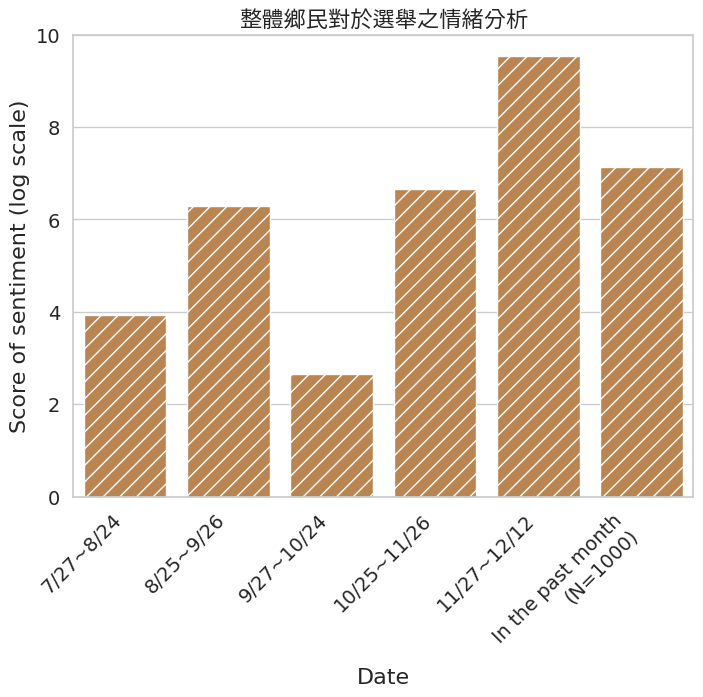

In [ ]:
#長條圖
#未篩選鄉民對於選舉的情緒分析
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Date', y='Score of sentiment', data= score_df,hatch='//',color='peru')
plt.title('整體鄉民對於選舉之情緒分析', fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Score of sentiment (log scale)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
bar_width = 0.2
plt.ylim(0, 10)
plt.show()

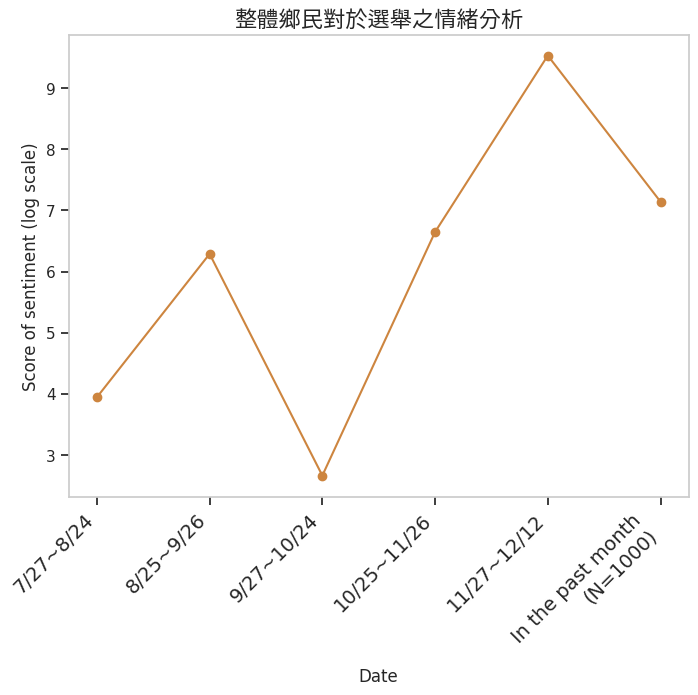

In [ ]:
#折線圖
plt.figure(figsize=(8, 6))
plt.plot(score_df['Date'],score_df['Score of sentiment'] , marker='o',color = 'peru')
plt.title('整體鄉民對於選舉之情緒分析',fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Score of sentiment (log scale)')

plt.grid(False)
plt.tick_params(axis='both', which='both', direction='out', bottom=True,left=True)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

###民眾黨

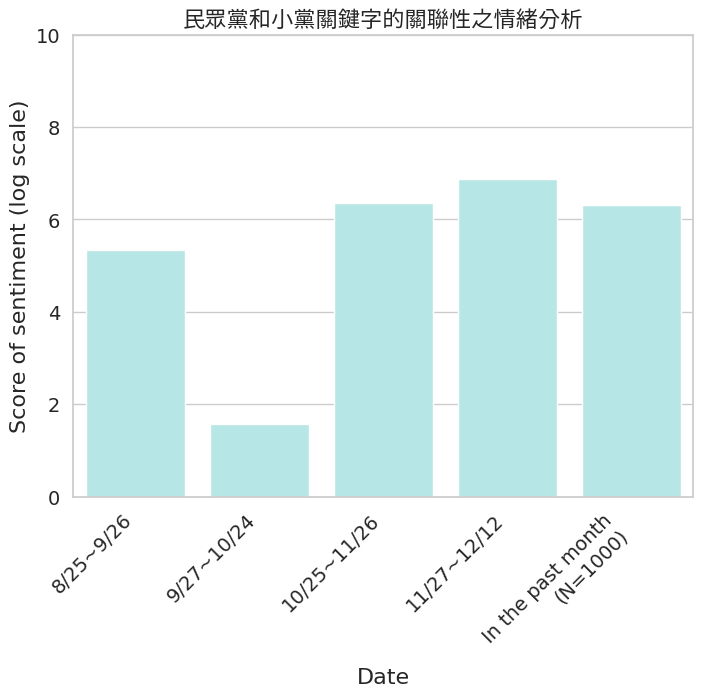

In [ ]:
#長條圖
#小黨關鍵字對於選舉的情緒分析
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Date', y='Score of sentiment', data= score_df1, color = 'paleturquoise')
plt.title('民眾黨和小黨關鍵字的關聯性之情緒分析', fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Score of sentiment (log scale)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
bar_width = 0.2
plt.ylim(0, 10)
plt.show()

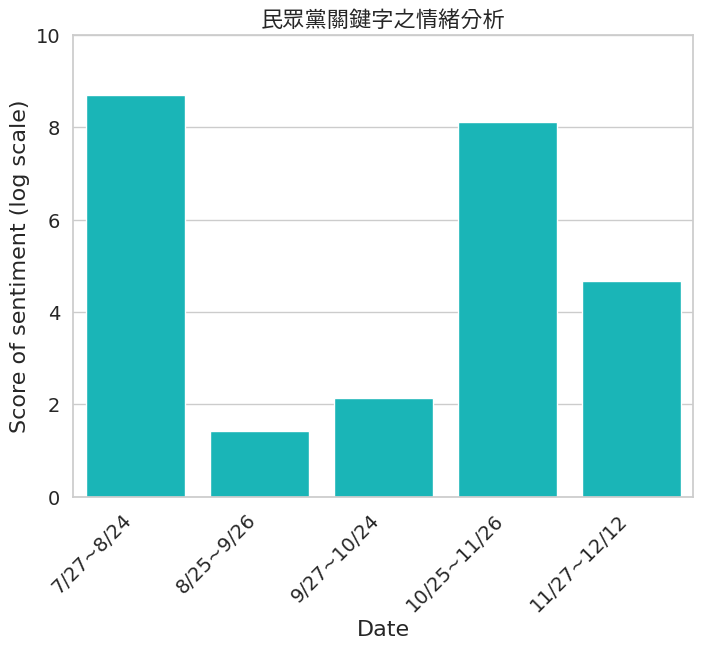

In [ ]:
#長條圖
#民眾黨關鍵字對於選舉的情緒分析
white_score_df = pd.read_csv('民眾黨相關評論.csv')
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Date', y='Score of sentiment', data= white_score_df, color = 'darkturquoise')
plt.title('民眾黨關鍵字之情緒分析', fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Score of sentiment (log scale)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
bar_width = 0.2
plt.ylim(0, 10)
plt.show()

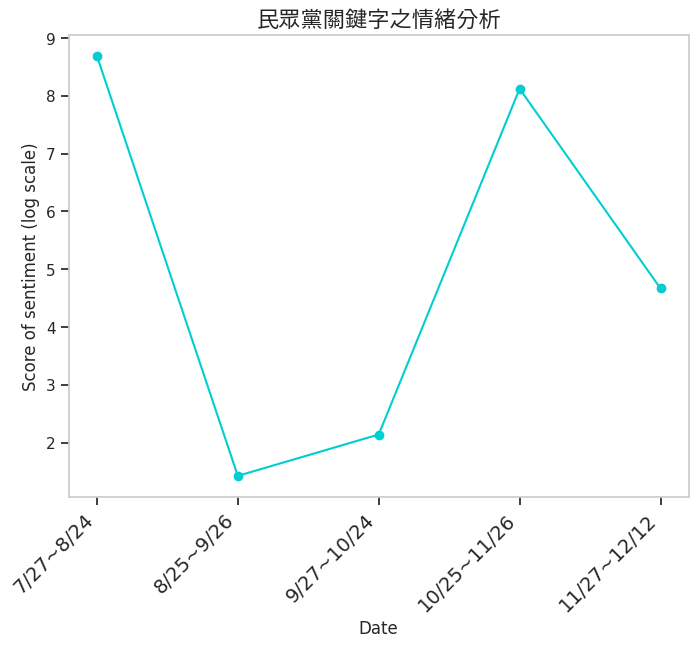

In [ ]:
#折線圖
plt.figure(figsize=(8, 6))
plt.plot(white_score_df['Date'],white_score_df['Score of sentiment'] , marker='o',color = 'darkturquoise')
plt.title('民眾黨關鍵字之情緒分析',fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Score of sentiment (log scale)')

plt.grid(False)
plt.tick_params(axis='both', which='both', direction='out', bottom=True,left=True)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

### 國民黨

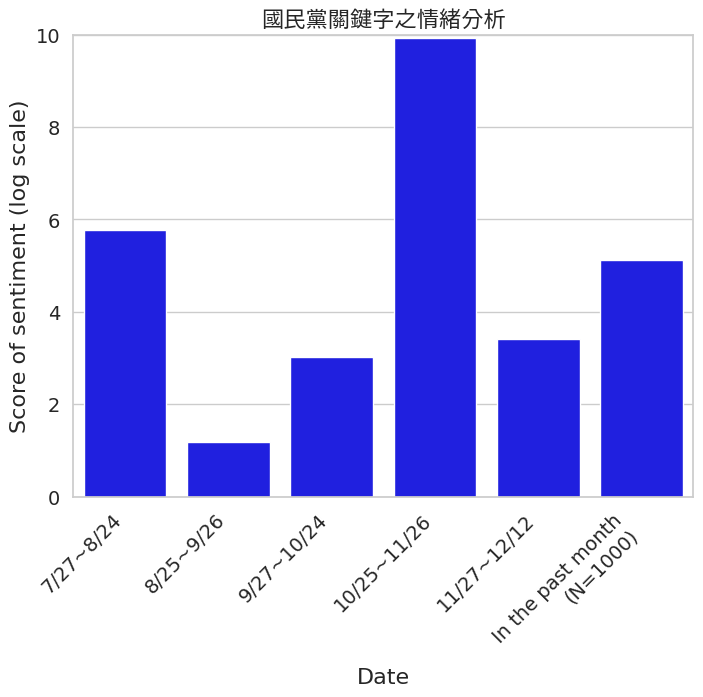

In [ ]:
#長條圖
#國民黨關鍵字對於選舉的情緒分析
blue_score_df = pd.read_csv('國民黨相關評論.csv')
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Date', y='Score of sentiment', data= blue_score_df, color = 'blue')
plt.title('國民黨關鍵字之情緒分析', fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Score of sentiment (log scale)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
bar_width = 0.2
plt.ylim(0, 10)
plt.show()

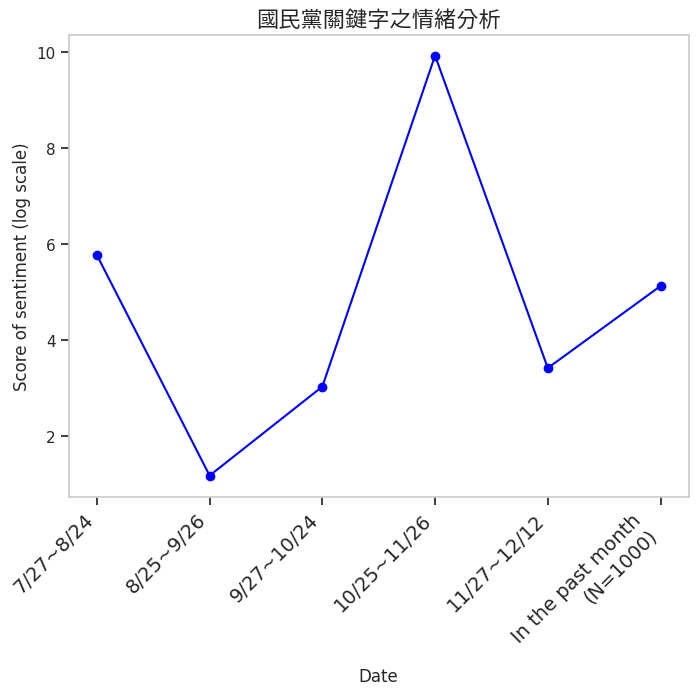

In [ ]:
#折線圖
plt.figure(figsize=(8, 6))
plt.plot(blue_score_df['Date'],blue_score_df['Score of sentiment'] , marker='o',color = 'blue')
plt.title('國民黨關鍵字之情緒分析',fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Score of sentiment (log scale)')

plt.grid(False)
plt.tick_params(axis='both', which='both', direction='out', bottom=True,left=True)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

### 民進黨

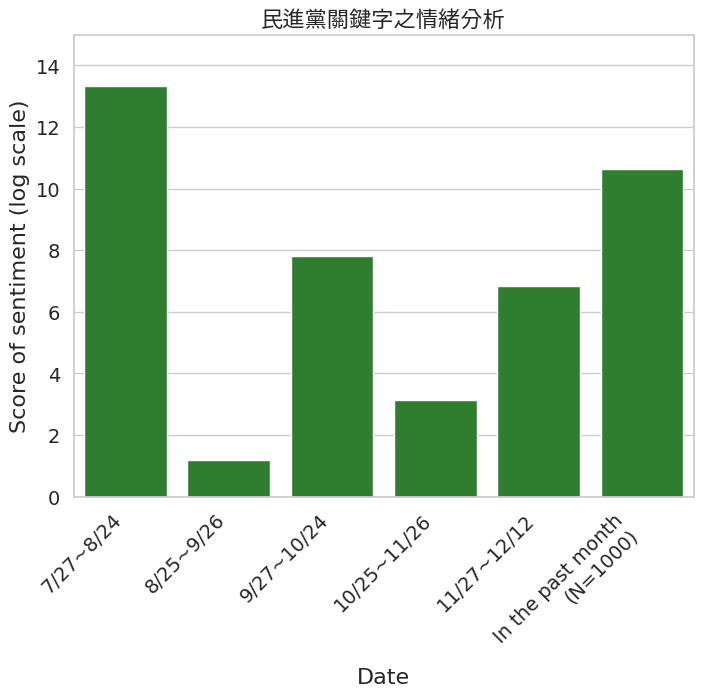

In [ ]:
#直條圖
#民進黨關鍵字對於選舉的情緒分析
green_score_df = pd.read_csv('民進黨相關評論.csv')
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Date', y='Score of sentiment', data= green_score_df, color ='forestgreen')
plt.title('民進黨關鍵字之情緒分析', fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Score of sentiment (log scale)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
bar_width = 0.2
plt.ylim(0, 15)
plt.show()

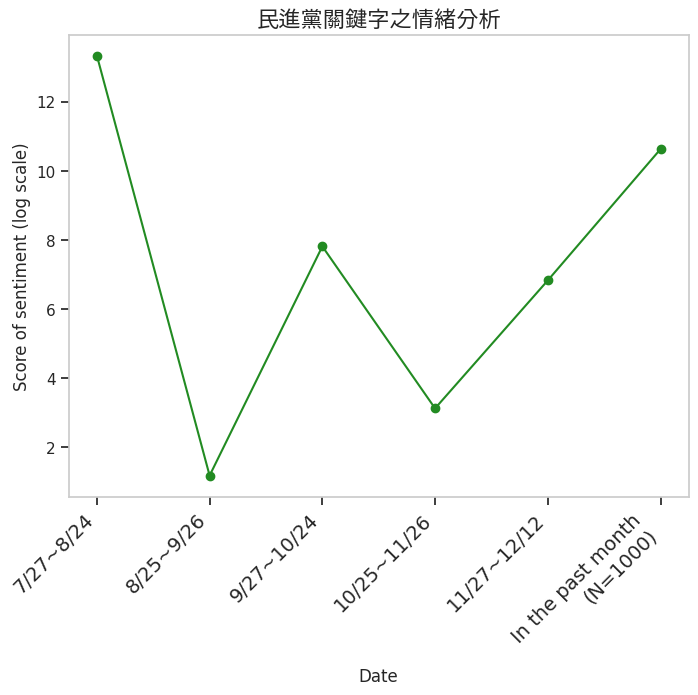

In [ ]:
#折線圖
plt.figure(figsize=(8, 6))
plt.plot(green_score_df['Date'],green_score_df['Score of sentiment'] , marker='o', color ='forestgreen')
plt.title('民進黨關鍵字之情緒分析',fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Score of sentiment (log scale)')

plt.grid(False)
plt.tick_params(axis='both', which='both', direction='out', bottom=True,left=True)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

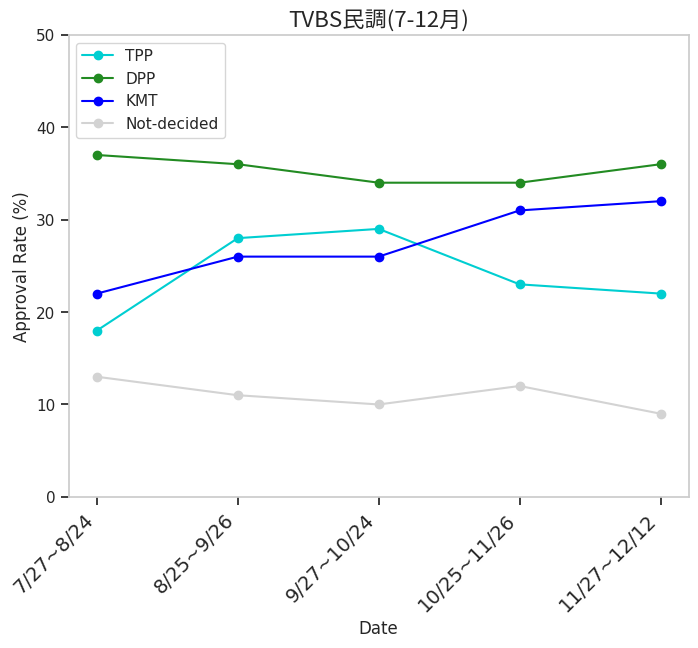

In [ ]:
#整體民調
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
totalpoll_df = pd.read_csv('民調.csv')

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot each line with a label
plt.plot(totalpoll_df['Date'], totalpoll_df['TPP'], marker='o', label='TPP',color='darkturquoise')
plt.plot(totalpoll_df['Date'], totalpoll_df['DPP'], marker='o', label='DPP',color='forestgreen')
plt.plot(totalpoll_df['Date'], totalpoll_df['KMT'], marker='o', label='KMT',color='blue')
plt.plot(totalpoll_df['Date'], totalpoll_df['Not-decided'], marker='o', label='Not-decided',color='lightgray')

# Set title, labels, and legend
plt.title('TVBS民調(7-12月)', fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Approval Rate (%)')
plt.legend(loc='upper left')  # Adjust the legend position

# Customize grid and ticks
plt.grid(False)
plt.tick_params(axis='both', which='both', direction='out', bottom=True, left=True)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 50)
# Show the plot
plt.show()



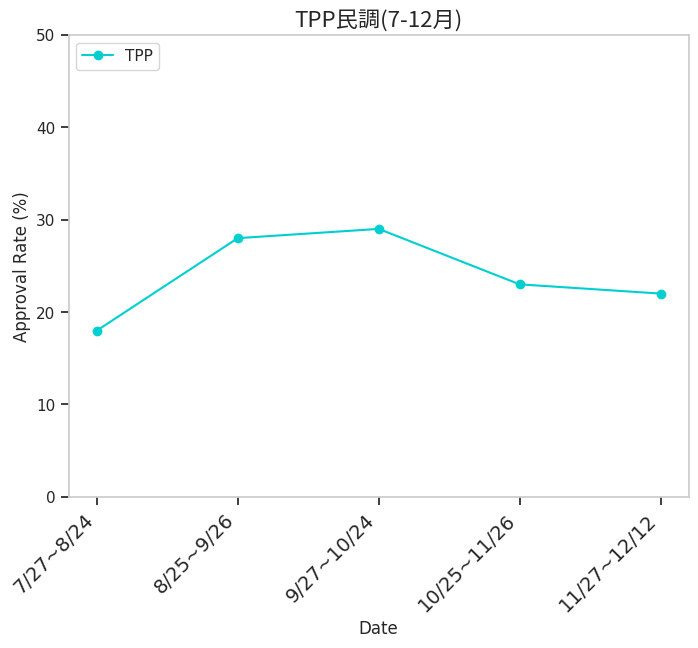

In [ ]:
#TPP
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
totalpoll_df = pd.read_csv('民調.csv')

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot each line with a label
plt.plot(totalpoll_df['Date'], totalpoll_df['TPP'], marker='o', label='TPP',color='darkturquoise')

# Set title, labels, and legend
plt.title('TPP民調(7-12月)', fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Approval Rate (%)')
plt.legend(loc='upper left')  # Adjust the legend position

# Customize grid and ticks
plt.grid(False)
plt.tick_params(axis='both', which='both', direction='out', bottom=True, left=True)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 50)
# Show the plot
plt.show()

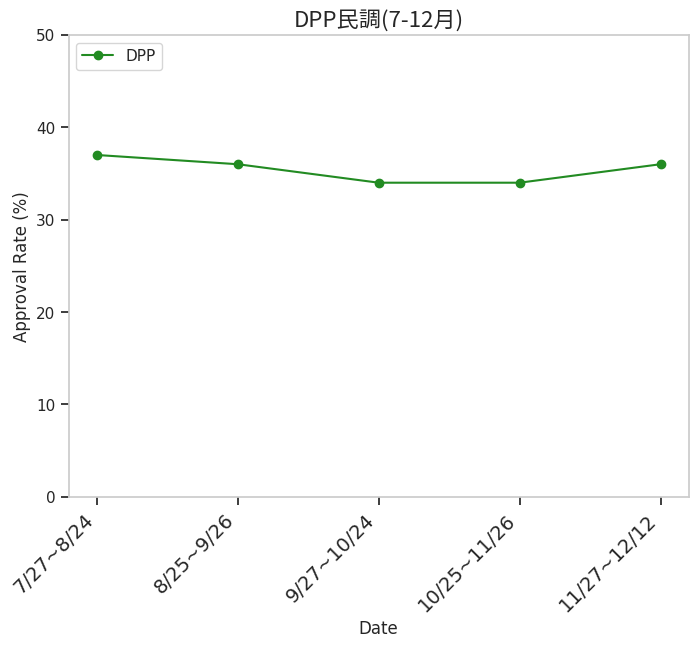

In [ ]:
#DPP
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
totalpoll_df = pd.read_csv('民調.csv')

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot each line with a label
plt.plot(totalpoll_df['Date'], totalpoll_df['DPP'], marker='o', label='DPP',color='forestgreen')

# Set title, labels, and legend
plt.title('DPP民調(7-12月)', fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Approval Rate (%)')
plt.legend(loc='upper left')  # Adjust the legend position

# Customize grid and ticks
plt.grid(False)
plt.tick_params(axis='both', which='both', direction='out', bottom=True, left=True)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 50)
# Show the plot
plt.show()

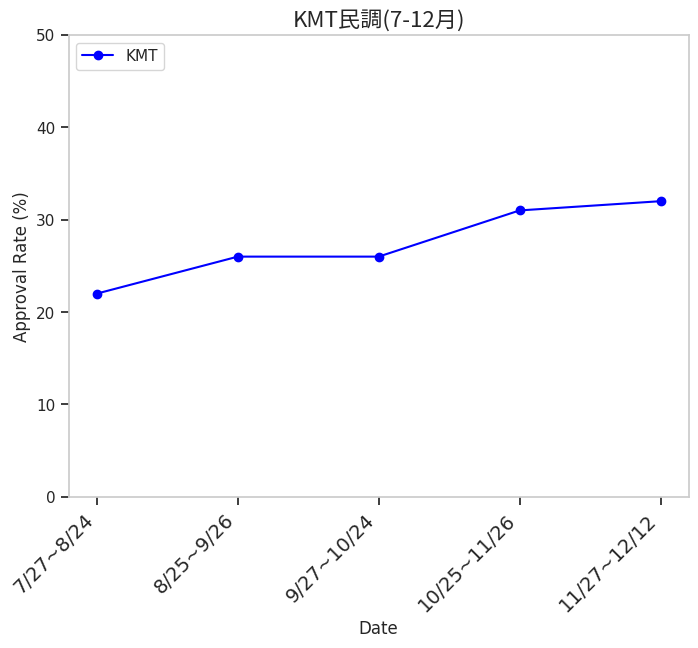

In [ ]:
#KMT
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
totalpoll_df = pd.read_csv('民調.csv')

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot each line with a label
plt.plot(totalpoll_df['Date'], totalpoll_df['KMT'], marker='o', label='KMT',color='blue')

# Set title, labels, and legend
plt.title('KMT民調(7-12月)', fontproperties='Taipei Sans TC Beta', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Approval Rate (%)')
plt.legend(loc='upper left')  # Adjust the legend position

# Customize grid and ticks
plt.grid(False)
plt.tick_params(axis='both', which='both', direction='out', bottom=True, left=True)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 50)
# Show the plot
plt.show()